In [12]:
%load_ext autoreload
%autoreload 2
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import nibabel as nib
import mne
import numpy as np

from cerebra_atlas_python.cerebra import CerebrA

In [14]:
cerebra = CerebrA()

# Make sure alignment between cerebra_in_head, t1 and wm is accurate


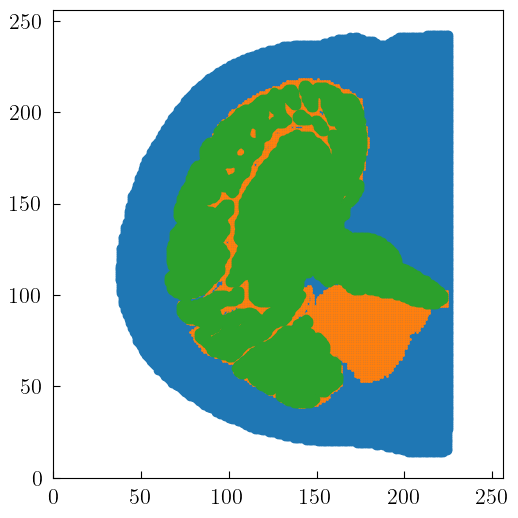

In [15]:
import matplotlib.pyplot as plt
from cerebra_atlas_python.plotting import plot_brain_slice_2d, slice_volume, project_volume_2d,get_2d_fig_ax

cerebra_in_head_data = nib.load(f"{cerebra.cerebra_data_path}/CerebrA_in_head.mgz").dataobj
fig,ax = get_2d_fig_ax()
data_slice = slice_volume(
            cerebra.mni_average.t1.dataobj, fixed_value=120, axis=0, n_layers=10
        )

xs_ys, cs, alphas,sizes = project_volume_2d(
    data_slice,
    axis=0
)
xs, ys = xs_ys.T
ax.scatter(xs, ys, c=cs, alpha=alphas, s=sizes)

data_slice = slice_volume(
            cerebra_in_head_data, fixed_value=120, axis=0, n_layers=10
        )

xs_ys, cs, alphas,sizes = project_volume_2d(
    data_slice,
    axis=0
)
xs, ys = xs_ys.T

ax.scatter(xs, ys, c=cs, alpha=alphas, s=1)

data_slice = slice_volume(
            cerebra.mni_average.wm.dataobj, fixed_value=120, axis=0, n_layers=10
        )

xs_ys, cs, alphas,sizes = project_volume_2d(
    data_slice,
    axis=0
)
xs, ys = xs_ys.T
ax.scatter(xs, ys, c=cs, alpha=alphas, s=sizes)



### Coordinate frame transforms

In [16]:
from cerebra_atlas_python.plotting import  plot_brain_slice_2d, orthoview
from cerebra_atlas_python.utils import move_volume_from_lia_to_ras, move_volume_from_ras_to_lia

In [17]:
data = np.array(cerebra.mni_average.t1.dataobj)
affine = np.array(cerebra.mni_average.t1.affine)

print(nib.orientations.aff2axcodes(affine))
plot_brain_slice_2d(data,affine)

('L', 'I', 'A')


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='Y', ylabel='Z'>)

In [18]:
t1_volume_ras, _ = move_volume_from_lia_to_ras(data.copy(), affine.copy())

After transforming the volume, the affine is not correct and should also be transformed

In [19]:
# The affine matrix should also be modified to be in RAS
orthoview(t1_volume_ras, affine, cmap_name="gray", plot_affine=True)
pass

In [20]:
print(nib.orientations.aff2axcodes(cerebra.mni_average.t1.affine))
affine

('L', 'I', 'A')


array([[  -1. ,    0. ,    0. ,  128.5],
       [   0. ,    0. ,    1. , -145.5],
       [   0. ,   -1. ,    0. ,  146.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [21]:
print(nib.orientations.aff2axcodes(affine))
affine

('L', 'I', 'A')


array([[  -1. ,    0. ,    0. ,  128.5],
       [   0. ,    0. ,    1. , -145.5],
       [   0. ,   -1. ,    0. ,  146.5],
       [   0. ,    0. ,    0. ,    1. ]])

### Transform affine matrix

Cerebra in head is in same coordinate frame as T1.mgz and wm.mgz 
(Same affine)

In [22]:
aff = affine.copy()
print(nib.orientations.aff2axcodes(aff))
aff

('L', 'I', 'A')


array([[  -1. ,    0. ,    0. ,  128.5],
       [   0. ,    0. ,    1. , -145.5],
       [   0. ,   -1. ,    0. ,  146.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [23]:
aff = cerebra.mni_average.t1.affine.copy()
print(nib.orientations.aff2axcodes(aff))
aff

('L', 'I', 'A')


array([[  -1. ,    0. ,    0. ,  128.5],
       [   0. ,    0. ,    1. , -145.5],
       [   0. ,   -1. ,    0. ,  146.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [24]:
aff = affine.copy()
print(nib.orientations.aff2axcodes(aff))
aff

('L', 'I', 'A')


array([[  -1. ,    0. ,    0. ,  128.5],
       [   0. ,    0. ,    1. , -145.5],
       [   0. ,   -1. ,    0. ,  146.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [25]:
# Switch from LIA to RIA
aff[0, 0] = 1
print(nib.orientations.aff2axcodes(aff))
aff

('R', 'I', 'A')


array([[   1. ,    0. ,    0. ,  128.5],
       [   0. ,    0. ,    1. , -145.5],
       [   0. ,   -1. ,    0. ,  146.5],
       [   0. ,    0. ,    0. ,    1. ]])

In [26]:
# Switch from RIA to RSA
aff[1, -1] = 256 - aff[2, -1]
aff[2, 1] = 1
print(nib.orientations.aff2axcodes(aff))
aff

('R', 'S', 'A')


array([[  1. ,   0. ,   0. , 128.5],
       [  0. ,   0. ,   1. , 109.5],
       [  0. ,   1. ,   0. , 146.5],
       [  0. ,   0. ,   0. ,   1. ]])

In [27]:
aff[1:3, :] = np.roll(aff[1:3, :],1,axis=0)
print(nib.orientations.aff2axcodes(aff))
aff

('R', 'A', 'S')


array([[  1. ,   0. ,   0. , 128.5],
       [  0. ,   1. ,   0. , 146.5],
       [  0. ,   0. ,   1. , 109.5],
       [  0. ,   0. ,   0. ,   1. ]])

In [30]:
t1_volume_ras, t1_affine_ras = move_volume_from_lia_to_ras(data, cerebra.mni_average.t1.affine)
t1_affine_ras

array([[  1. ,   0. ,   0. , 126. ],
       [  0. ,   1. ,   0. , 146.5],
       [  0. ,   0. ,   1. , 109.5],
       [  0. ,   0. ,   0. ,   1. ]])

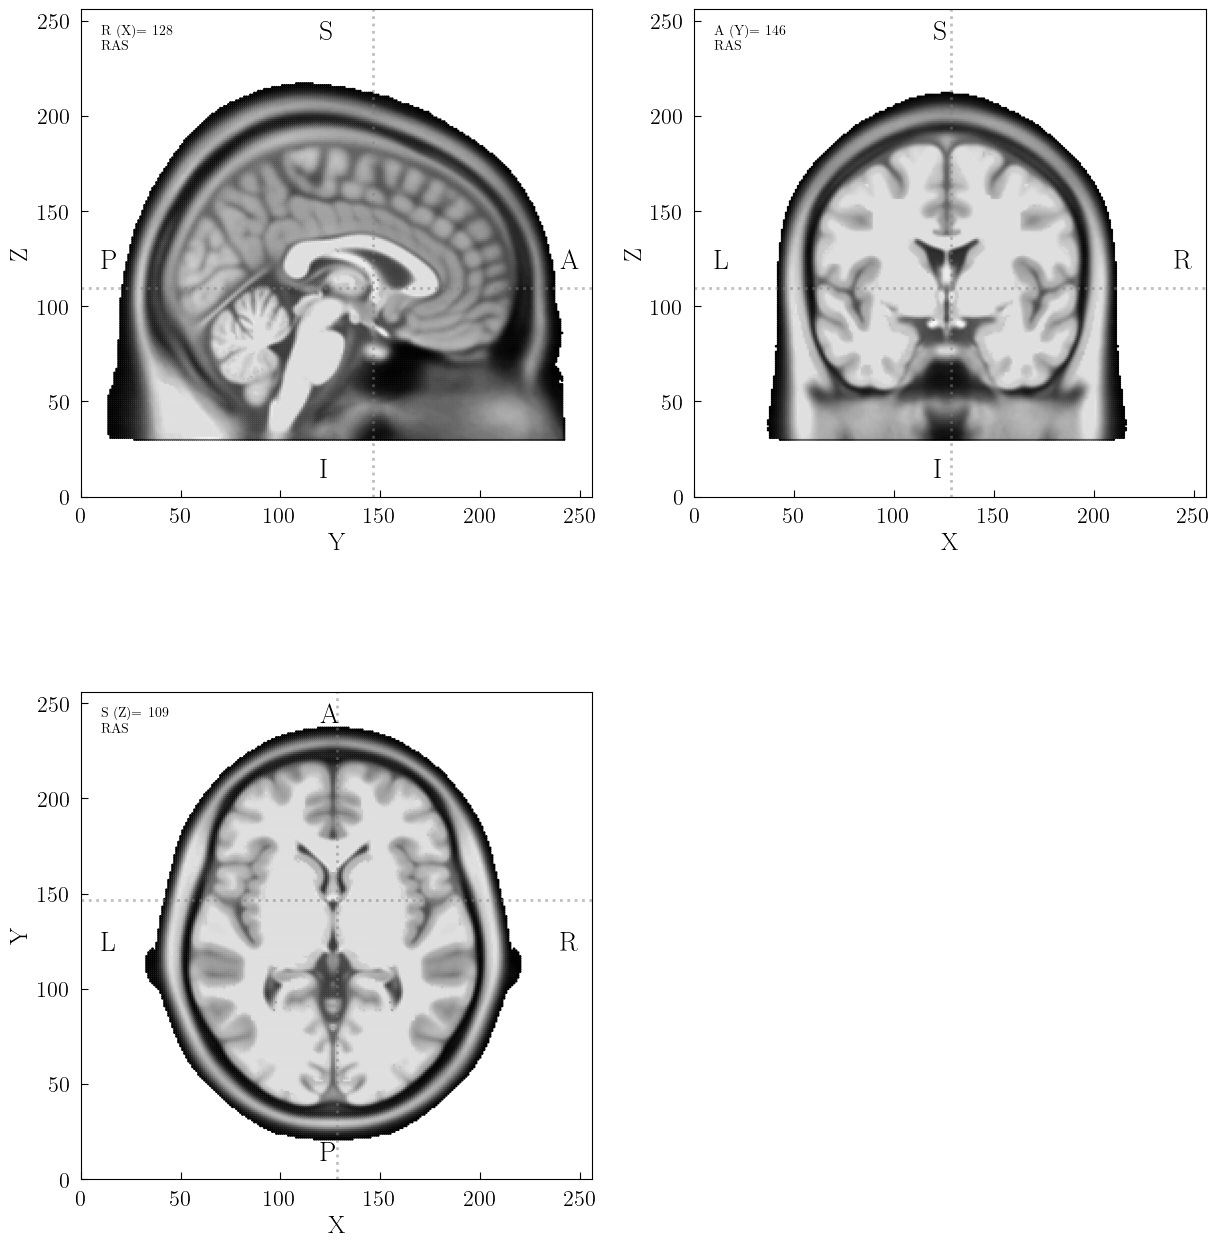

In [31]:
# The affine matrix should also be modified to be in RAS
orthoview(t1_volume_ras, aff, cmap_name="gray", plot_affine=True)
pass

### Adjust affine?

In [33]:
from cerebra_atlas_python.utils import inspect_img
cerebra_in_head_img, cerebra_volume_LIA = inspect_img(f"{cerebra.cerebra_data_path}/CerebrA_in_head.mgz")
cerebra_volume_RAS, cerebra_affine_RAS = move_volume_from_lia_to_ras(cerebra_volume_LIA, cerebra_in_head_img.affine)

In [34]:
def is_left_hemisphere(slice):
    if slice.sum() == 0:
        return False
    # No points from right hemisphere
    check1 = np.logical_and(slice>0, slice<52).sum() == 0
    # Some point from left hemisphere
    check2 = np.logical_and(slice>52, slice<103).sum() != 0
    if check1 != check2:
        raise(f"errrrrr {check1= } {check2= }")
    return check1

In [35]:
# # Whats the left hemisphere actual limit
# for L in range(-128,-100, 1):
#     dat = cerebra_volume_LIA[L, :, :]
#     # If right hemisphere continue
#     if is_left_hemisphere(dat):
#         print(f"{L= } is left brain for cerebra_volume_LIA")
#         break
#     else:
#         print(f"{L= } is right brain for cerebra_volume_LIA")
#     # If right hemisphere continue
#     if not is_left_hemisphere(dat):
#         print(f"{R= } is right brain for cerebra_volume_RAS")
#         break
#     else:
#         print(f"{R= } is left brain for cerebra_volume_RAS")

# # RAS:
# R = 125 is left brain
# R = 126 is right brain

In [36]:
aff_adjusted = aff.copy()

(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

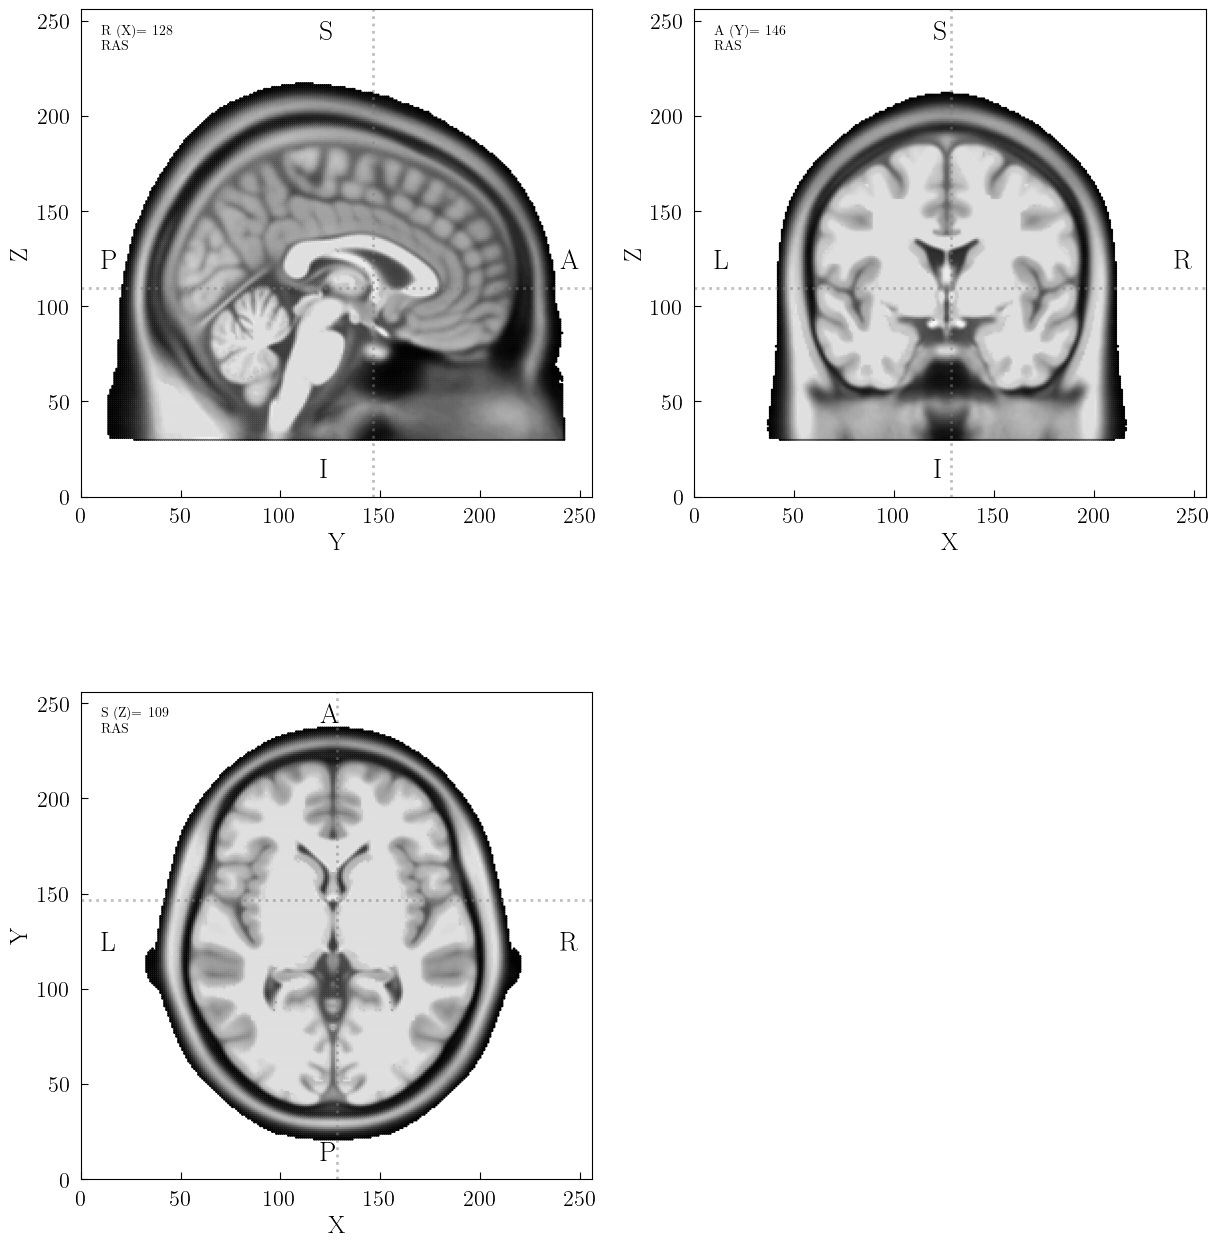

In [37]:
# Not quite aligned
orthoview(t1_volume_ras, aff, cmap_name="gray", plot_affine=True)

In [38]:
aff_adjusted[0, -1] = 126  # Fix translation

(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

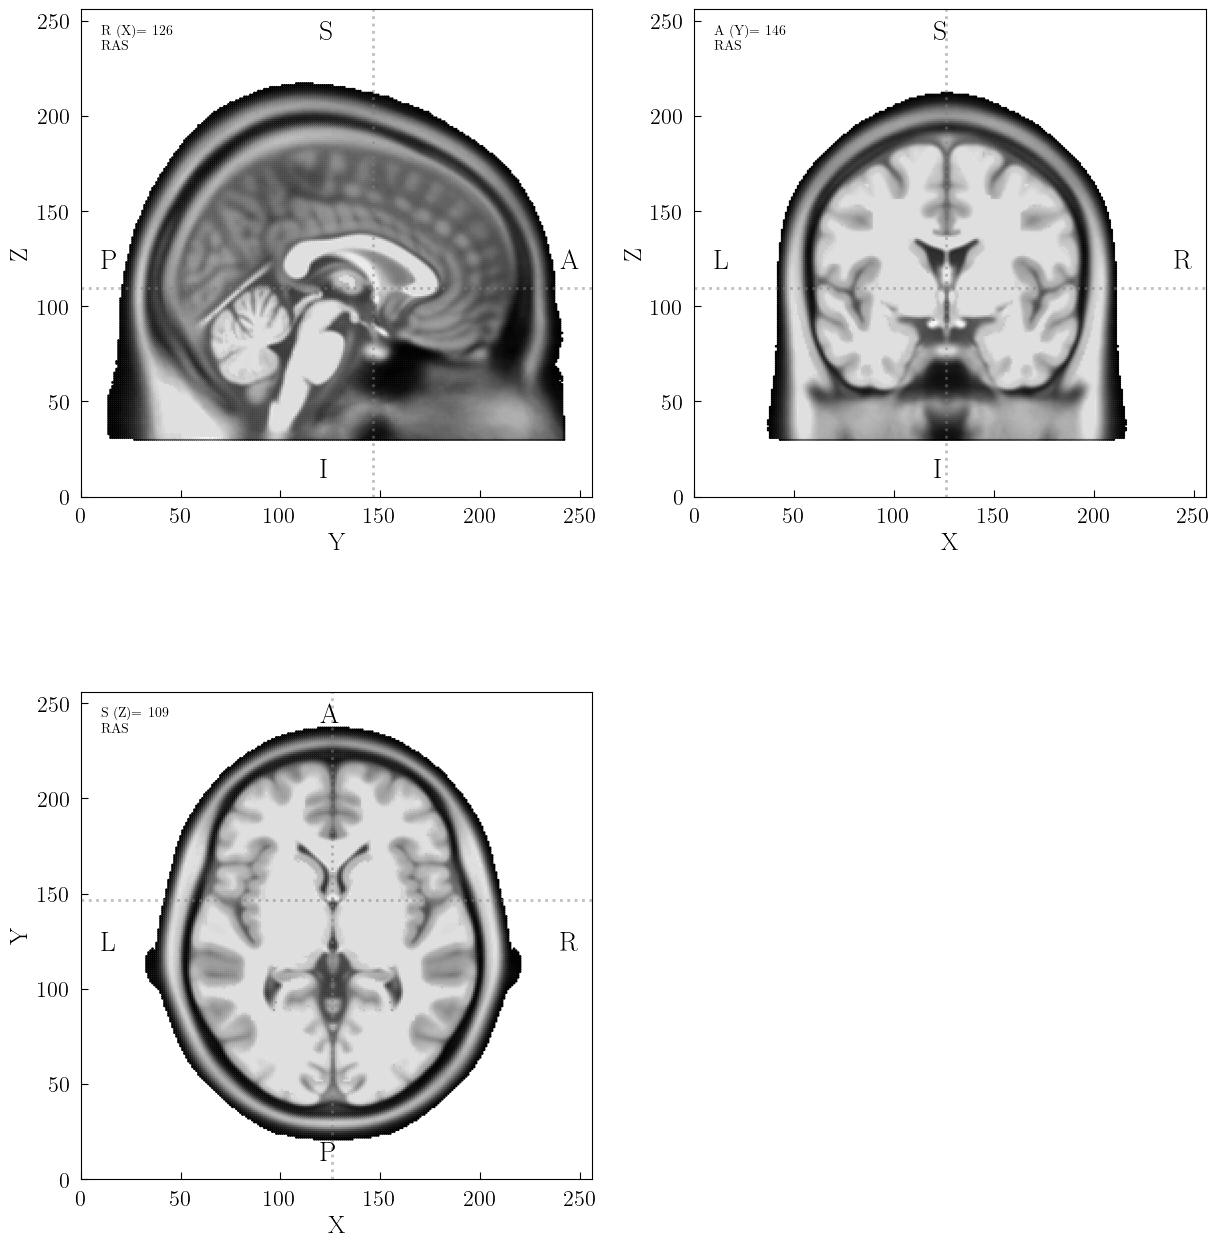

In [39]:
# The bound between right and left hemisphere looks better. Affine has to be
# manually adjusted
orthoview(t1_volume_ras, aff_adjusted, cmap_name="gray", plot_affine=True)

### EVERYTHING IS ALIGNED NOW

(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

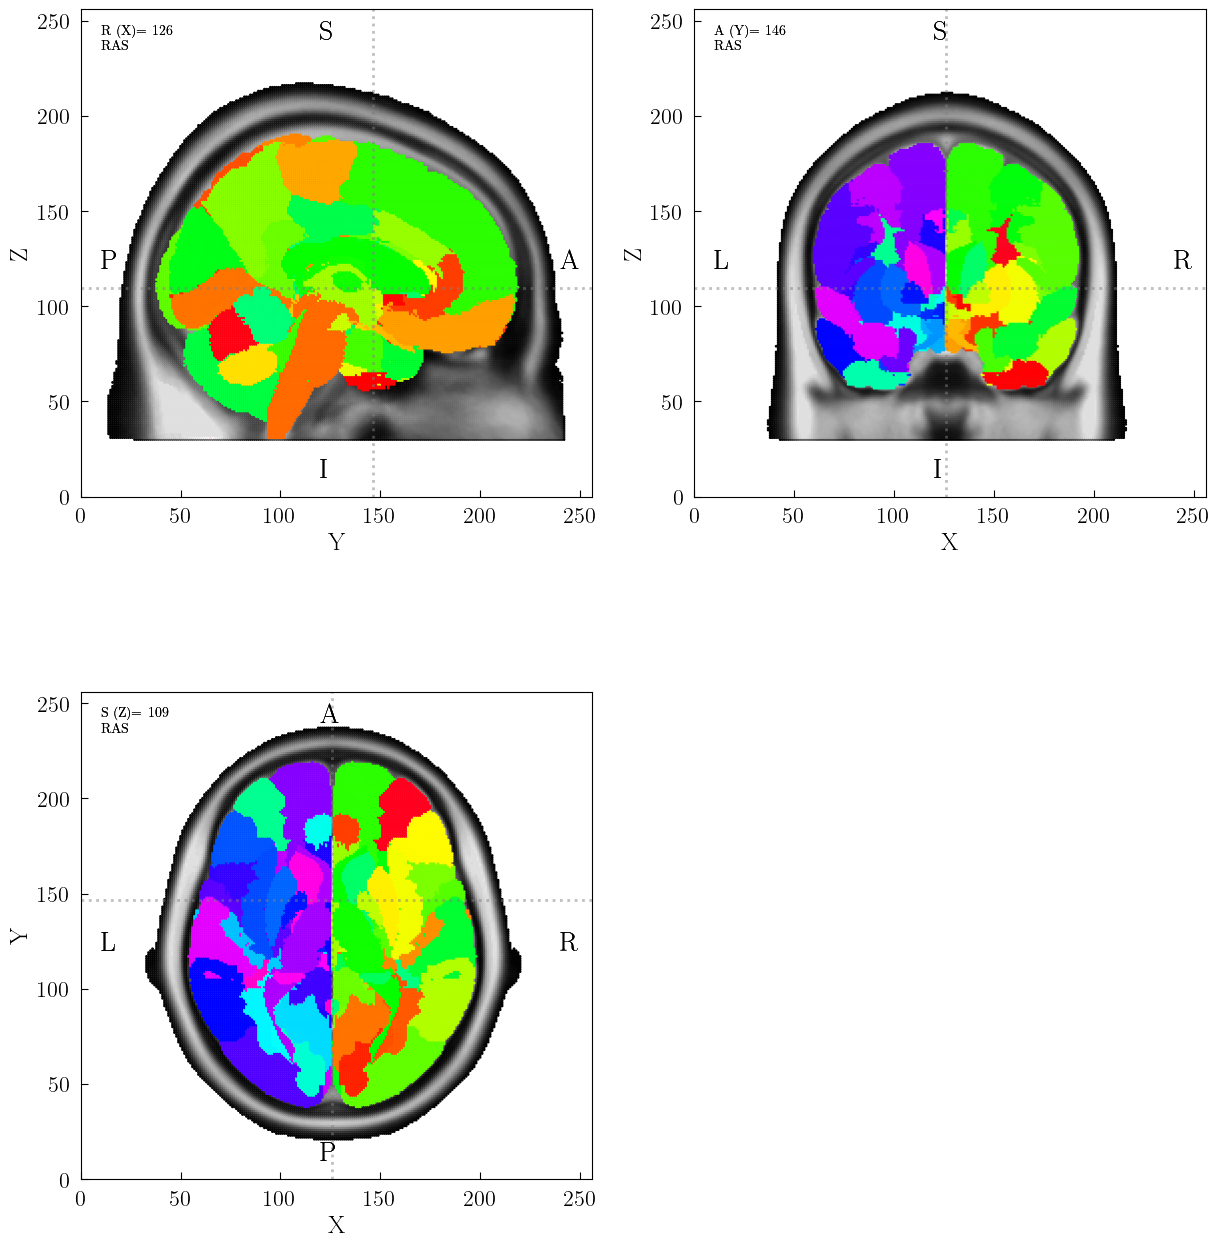

In [40]:
fig, axs = orthoview(t1_volume_ras, aff_adjusted, cmap_name="gray", plot_affine=True)
orthoview(cerebra_volume_RAS, aff_adjusted,fig=fig, axs=axs)

#### Moving back from RAS to LIA

('L', 'I', 'A')


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

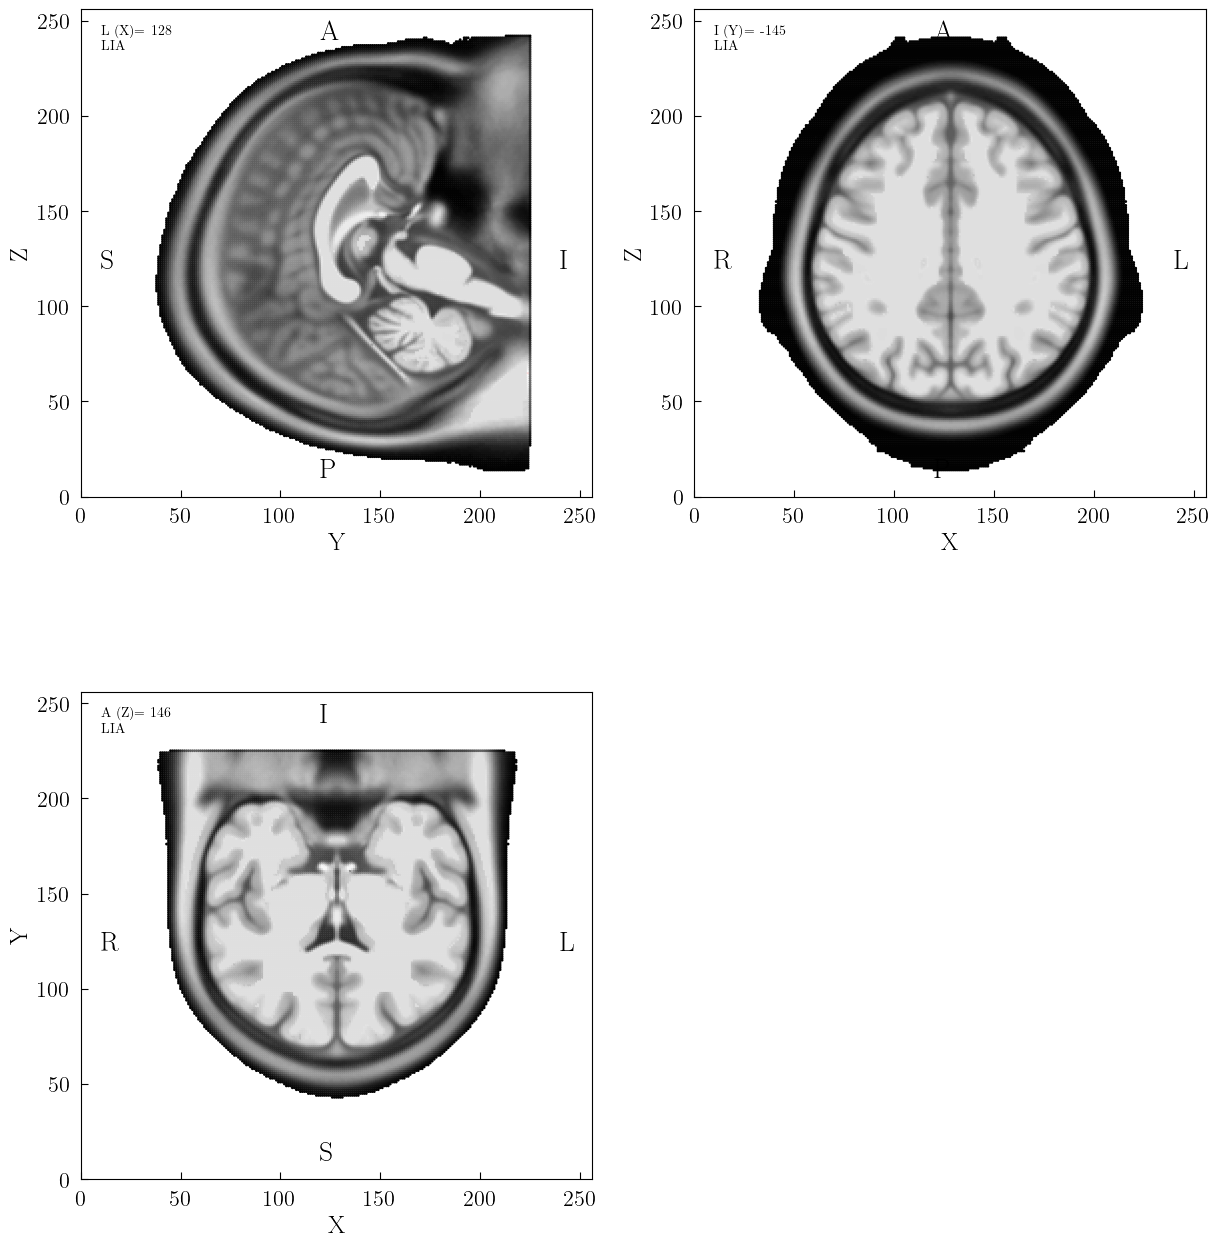

In [41]:
data = np.array(cerebra.mni_average.t1.dataobj)
affine = np.array(cerebra.mni_average.t1.affine)

print(nib.orientations.aff2axcodes(affine))
orthoview(data,affine)

(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

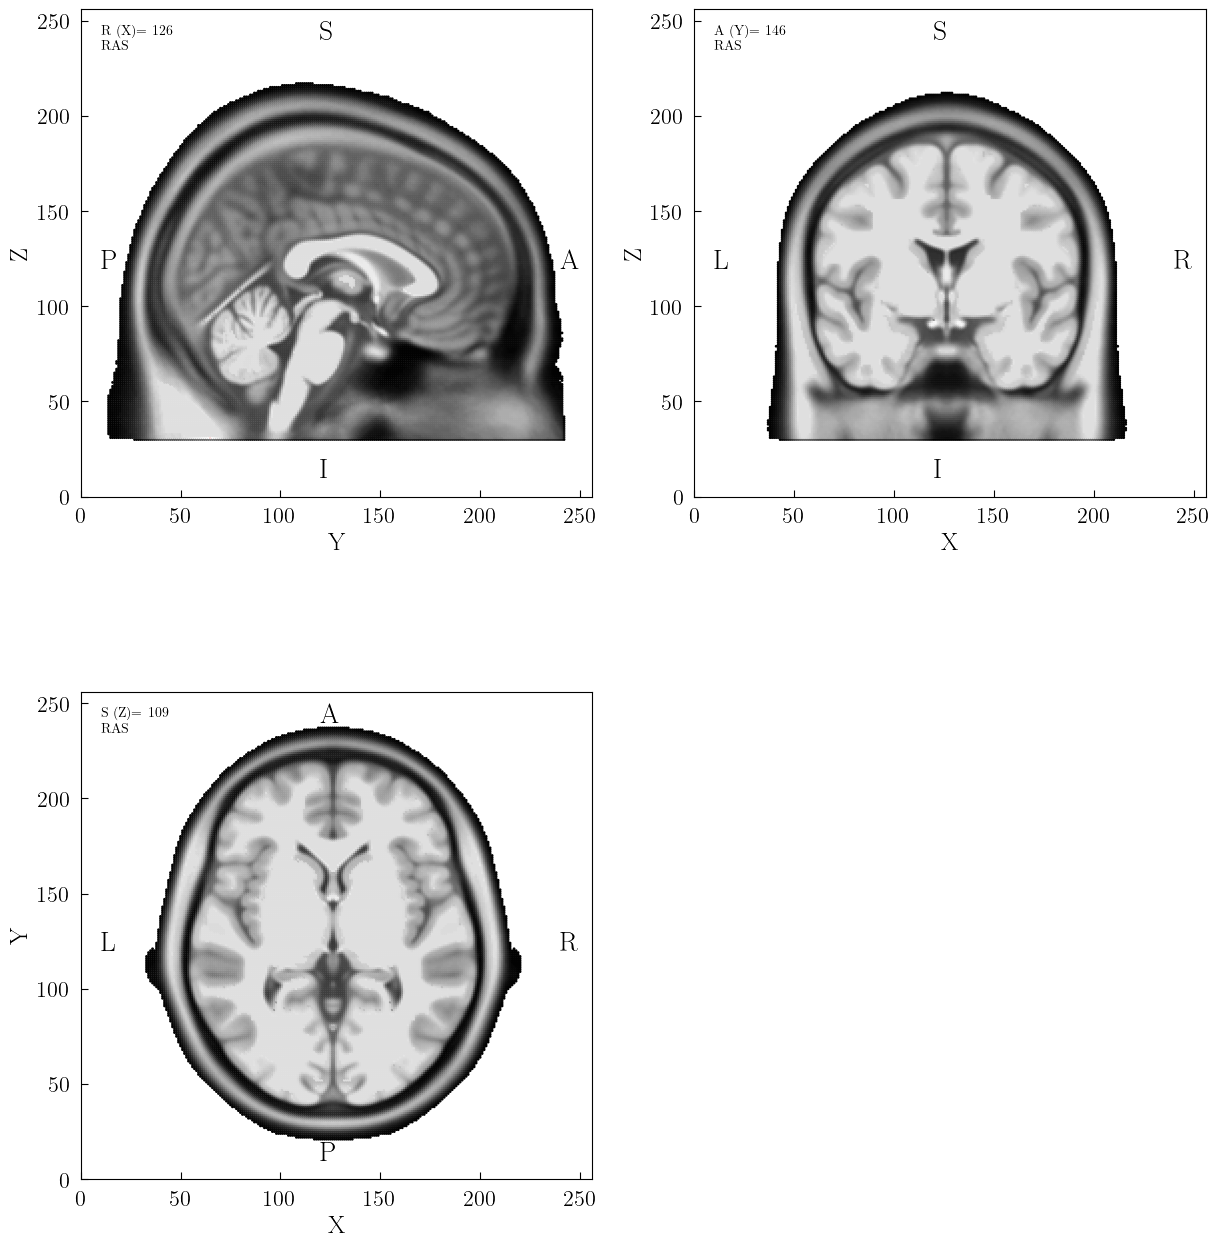

In [42]:
data_ras,affine_ras = move_volume_from_lia_to_ras(data, affine)
orthoview(data_ras,affine_ras)

(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

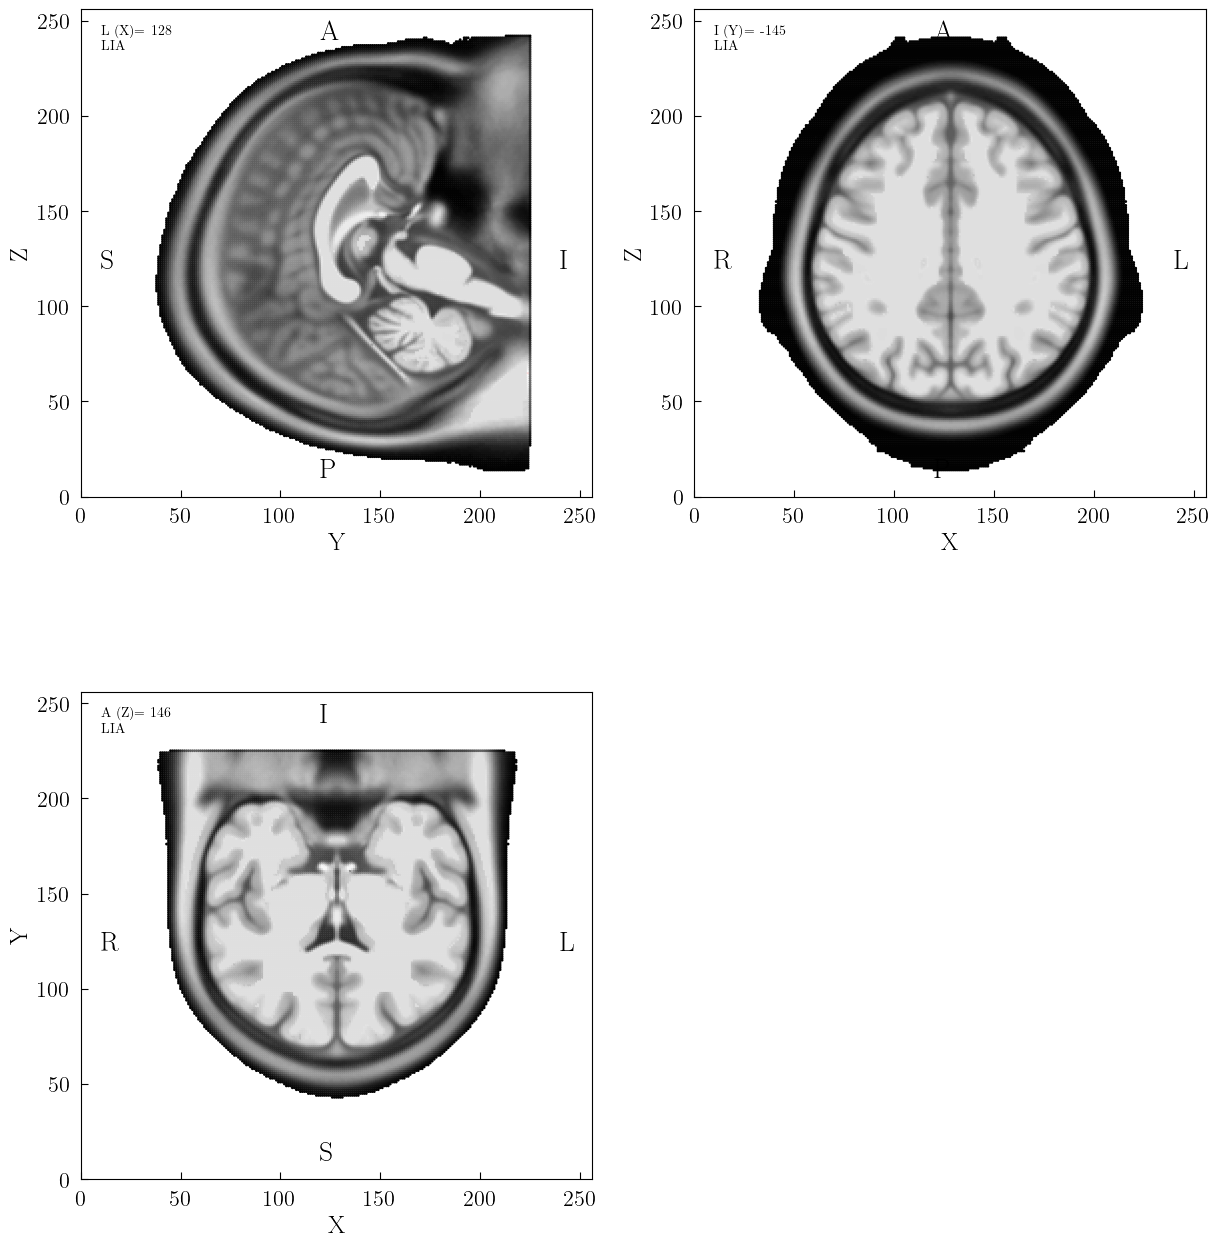

In [43]:
data_back_lia = move_volume_from_ras_to_lia(data_ras)
orthoview(data_back_lia,affine)